# Exploração dos dados

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class CreditCardDefaultExploration:
    def __init__(self, data):
        self.data = data
    
    def distribution_default(self):
        sns.countplot(x='default', data=self.data, hue='default')
        plt.title('Distribuição de Inadimplência')
        plt.xlabel('0: Não Inadimplente | 1: Inadimplente')
        plt.ylabel('Contagem')
        plt.show()
    
    def distribution_limit_bal(self):
        # Gráfico de distribuição de LIMIT_BAL (Limite de Crédito)
        plt.figure(figsize=(10, 6))
        sns.histplot(self.data['LIMIT_BAL'], bins=30, kde=True)
        plt.title('Distribuição do Limite de Crédito')
        plt.xlabel('Limite de Crédito (NT$)')
        plt.ylabel('Frequência')
        plt.grid(True)
        plt.show()

        # Comentário sobre o gráfico
        print("O gráfico mostra a distribuição do limite de crédito. A maioria dos clientes tem limites em torno de NT$50.000 a NT$300.000.")
    
    def age_distribution(self):
        # Gráfico de distribuição de idade
        plt.figure(figsize=(10, 6))
        sns.histplot(self.data['AGE'], bins=20, kde=True, color='green')
        plt.title('Distribuição de Idade dos Clientes')
        plt.xlabel('Idade')
        plt.ylabel('Frequência')
        plt.grid(True)
        plt.show()

        # Comentário sobre o gráfico
        print("O gráfico revela que a maioria dos clientes tem entre 20 e 40 anos. Existem poucos clientes acima de 60 anos.")
    
    def age_vs_default(self):
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='default', y='AGE', data=self.data, hue='default')
        plt.title('Distribuição da Idade por Inadimplência')
        plt.xlabel('Inadimplente (0 = Não, 1 = Sim)')
        plt.ylabel('Idade')
        plt.show()
    
    def limit_vs_default(self):
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='default', y='LIMIT_BAL', data=self.data, hue='default')
        plt.title('Distribuição do Limite de Crédito por Inadimplência')
        plt.xlabel('Inadimplente (0 = Não, 1 = Sim)')
        plt.ylabel('Limite de Crédito')
        plt.show()
    
    def sex_vs_default(self):
        # Gráfico de contagem por sexo e inadimplência
        plt.figure(figsize=(8, 6))
        sns.countplot(x='SEX', hue='default', data=self.data)
        plt.title('Distribuição de Inadimplência por Sexo')
        plt.xlabel('Sexo (1 = Masculino, 2 = Feminino)')
        plt.ylabel('Contagem')
        plt.legend(title='Inadimplente')
        plt.show()

        # Comentário sobre o gráfico
        print("Aqui podemos ver a proporção de inadimplência entre homens e mulheres. Parece que ambos os sexos apresentam comportamento similar de inadimplência.")

    def education_vs_default(self):
        # Gráfico de contagem por nível de educação e inadimplência
        plt.figure(figsize=(10, 6))
        sns.countplot(x='EDUCATION', hue='default', data=self.data)
        plt.title('Inadimplência por Nível de Educação')
        plt.xlabel('Educação (1 = Pós-graduação, 2 = Graduação, 3 = Ensino Médio, 4 = Outros)')
        plt.ylabel('Contagem')
        plt.legend(title='Inadimplente')
        plt.show()

        # Comentário sobre o gráfico
        print("O nível de educação parece influenciar na inadimplência, com clientes com ensino médio apresentando maior taxa de inadimplência.")


    def marriage_vs_default(self):
        plt.figure(figsize=(10, 6))
        sns.countplot(x='MARRIAGE', hue='default', data=self.data)
        plt.title('Inadimplência por Estado Civil')
        plt.xlabel('Estado Civil (1 = Casado, 2 = Solteiro, 3 = Outros)')
        plt.ylabel('Contagem')
        plt.legend(title='Inadimplente')
        plt.show()

        # Comentário sobre o gráfico
        print("Observa-se que clientes solteiros têm uma taxa de inadimplência ligeiramente superior em comparação aos casados.")

    def age_and_marriage_vs_default(self):
        plt.subplots(ncols=1, figsize=(16,6))
        sns.boxplot(x='MARRIAGE', y='AGE', hue='default', data=self.data, showfliers=False)
        plt.show()

    def pay_vs_default(self):
        plt.figure(figsize=(10, 6))
        sns.countplot(x='PAY_1', hue='default', data=self.data)
        plt.title('Atrasos no Pagamento (PAY_1) por Default')
        plt.xlabel('Default')
        plt.ylabel('PAY_1')
        plt.show()
        print("Comentário: Clientes inadimplentes tendem a ter maiores atrasos no pagamento na primeira parcela.")

    def pay_amt_vs_default(self):
        sns.boxplot(x='default', y='PAY_AMT1', hue='default', data=self.data)
        plt.title('Comparativo de Valor da Pagamento de Fatura (PAY_AMT1) por Default')
        plt.xlabel('Default')
        plt.ylabel('Pagamento de Fatura 1')
        plt.show()
        
    def bill_vs_default(self):
        sns.boxplot(x='default', y='BILL_AMT1', hue='default', data=self.data)
        plt.title('Comparativo de Valor da Fatura (BILL_AMT1) por Default')
        plt.xlabel('Default')
        plt.ylabel('Valor da Fatura 1')
        plt.show()
        print("Comentário: Clientes com faturas mais altas não necessariamente apresentam maior taxa de inadimplência.")
        
    def bill_amount_trend(self):
        # Gráfico da média de valor da fatura por mês
        bill_columns = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
        bill_avg = self.data[bill_columns].mean()
        
        plt.figure(figsize=(10, 6))
        plt.plot(bill_columns, bill_avg, marker='o', color='purple')
        plt.title('Tendência dos Valores de Fatura Médios por Mês')
        plt.xlabel('Mês')
        plt.ylabel('Valor Médio da Fatura (NT$)')
        plt.grid(True)
        plt.show()

        # Comentário sobre o gráfico
        print("Esse gráfico mostra a média do valor das faturas ao longo dos 6 meses.")
    
    def correlacao(self):
        plt.figure(figsize=(15, 15))
        corr = self.data.corr()
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
        plt.title('Matriz de Correlação')
        plt.show()
        

# Exemplo de uso:
# Carregue o dataset e inicialize a classe
data = pd.read_csv('UCI_Credit_Card.csv')
explorer = CreditCardDefaultExploration(data)

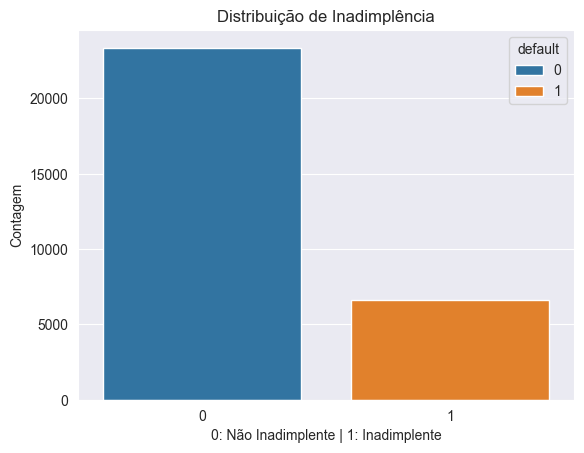

In [167]:
explorer.distribution_default()

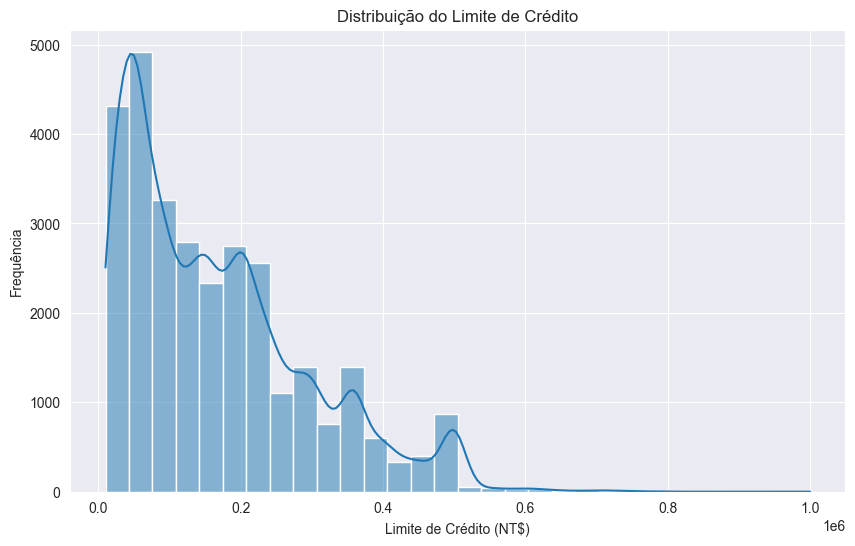

O gráfico mostra a distribuição do limite de crédito. A maioria dos clientes tem limites em torno de NT$50.000 a NT$300.000.


In [168]:
# Chame os métodos para explorar os dados
explorer.distribution_limit_bal()

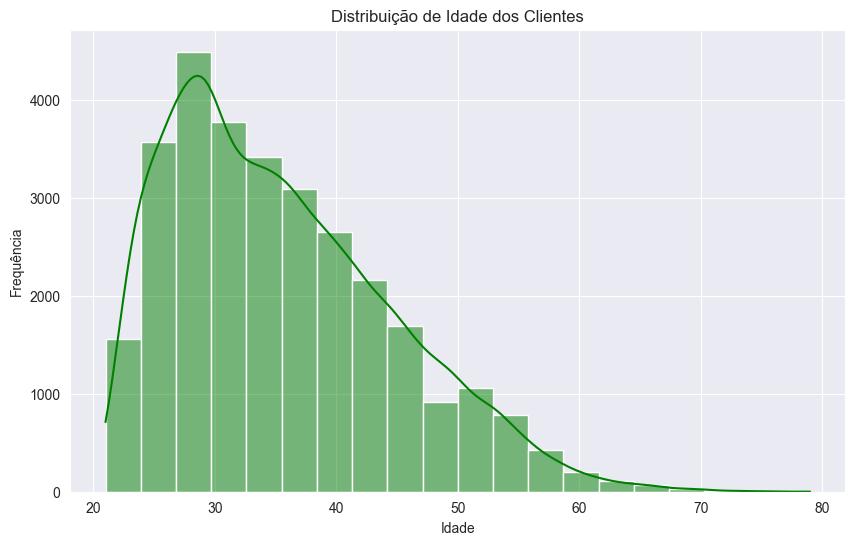

O gráfico revela que a maioria dos clientes tem entre 20 e 40 anos. Existem poucos clientes acima de 60 anos.


In [169]:
explorer.age_distribution()

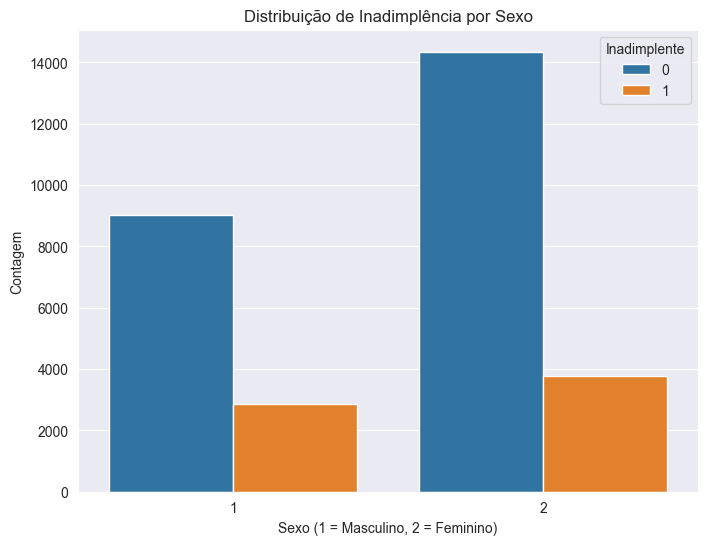

Aqui podemos ver a proporção de inadimplência entre homens e mulheres. Parece que ambos os sexos apresentam comportamento similar de inadimplência.


In [170]:
explorer.sex_vs_default()

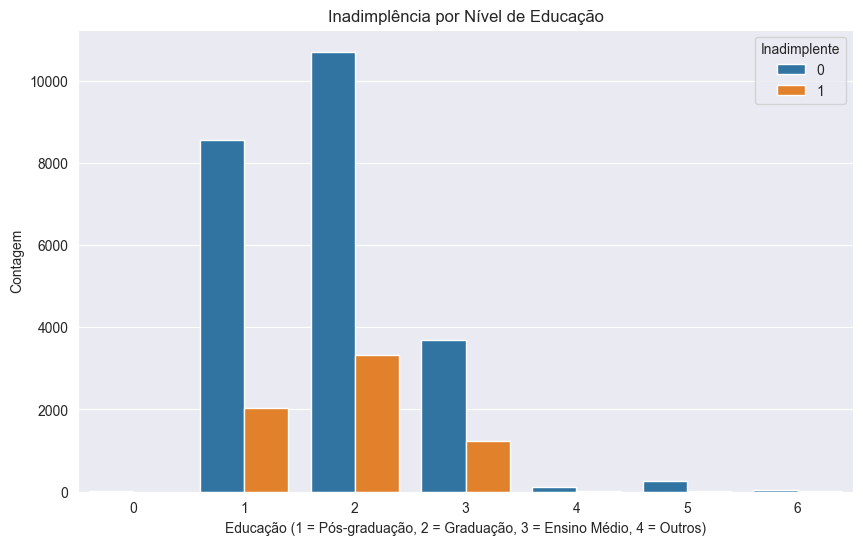

O nível de educação parece influenciar na inadimplência, com clientes com ensino médio apresentando maior taxa de inadimplência.


In [171]:
explorer.education_vs_default()

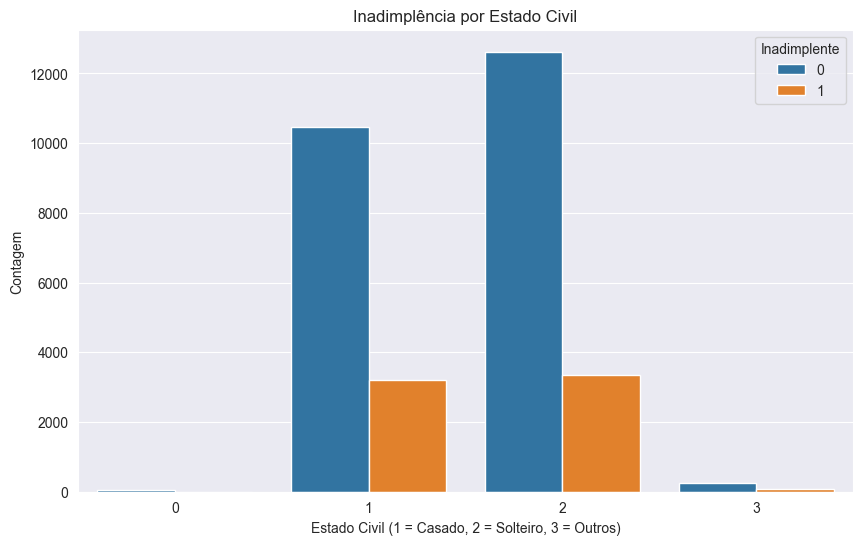

Observa-se que clientes solteiros têm uma taxa de inadimplência ligeiramente superior em comparação aos casados.


In [172]:
explorer.marriage_vs_default()

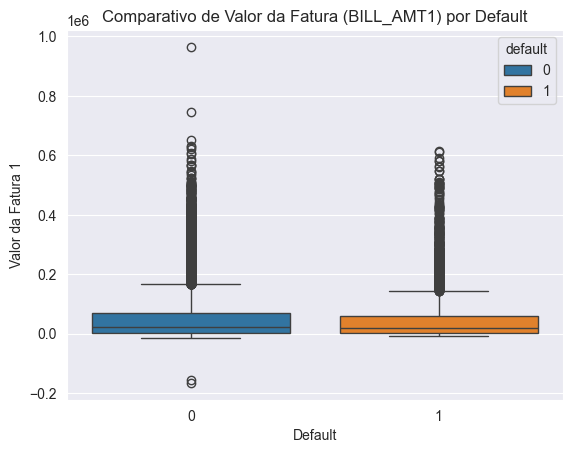

Comentário: Clientes com faturas mais altas não necessariamente apresentam maior taxa de inadimplência.


In [173]:
explorer.bill_vs_default()

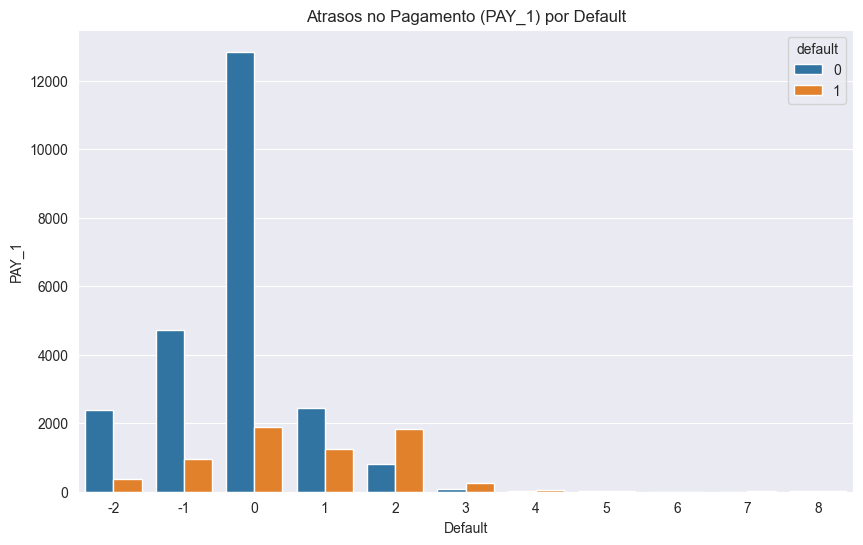

Comentário: Clientes inadimplentes tendem a ter maiores atrasos no pagamento na primeira parcela.


In [174]:
explorer.pay_vs_default()

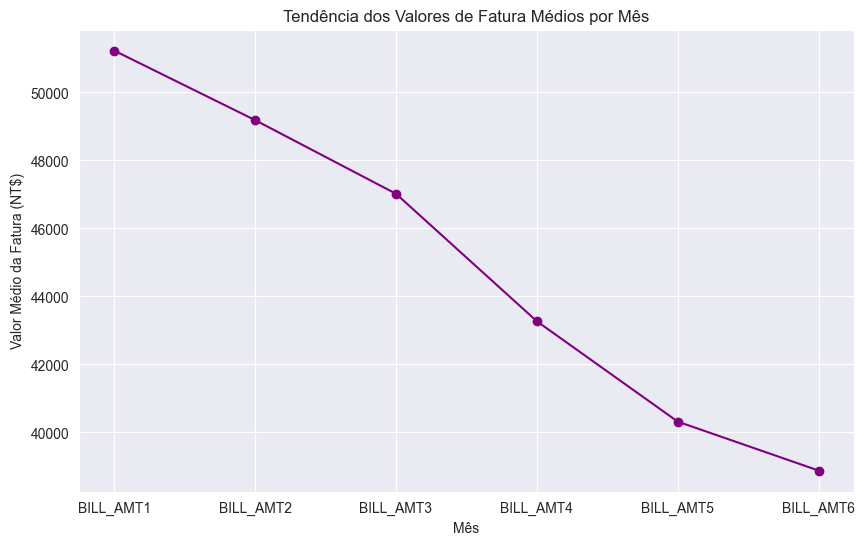

Esse gráfico mostra a média do valor das faturas ao longo dos 6 meses.


In [175]:
explorer.bill_amount_trend()

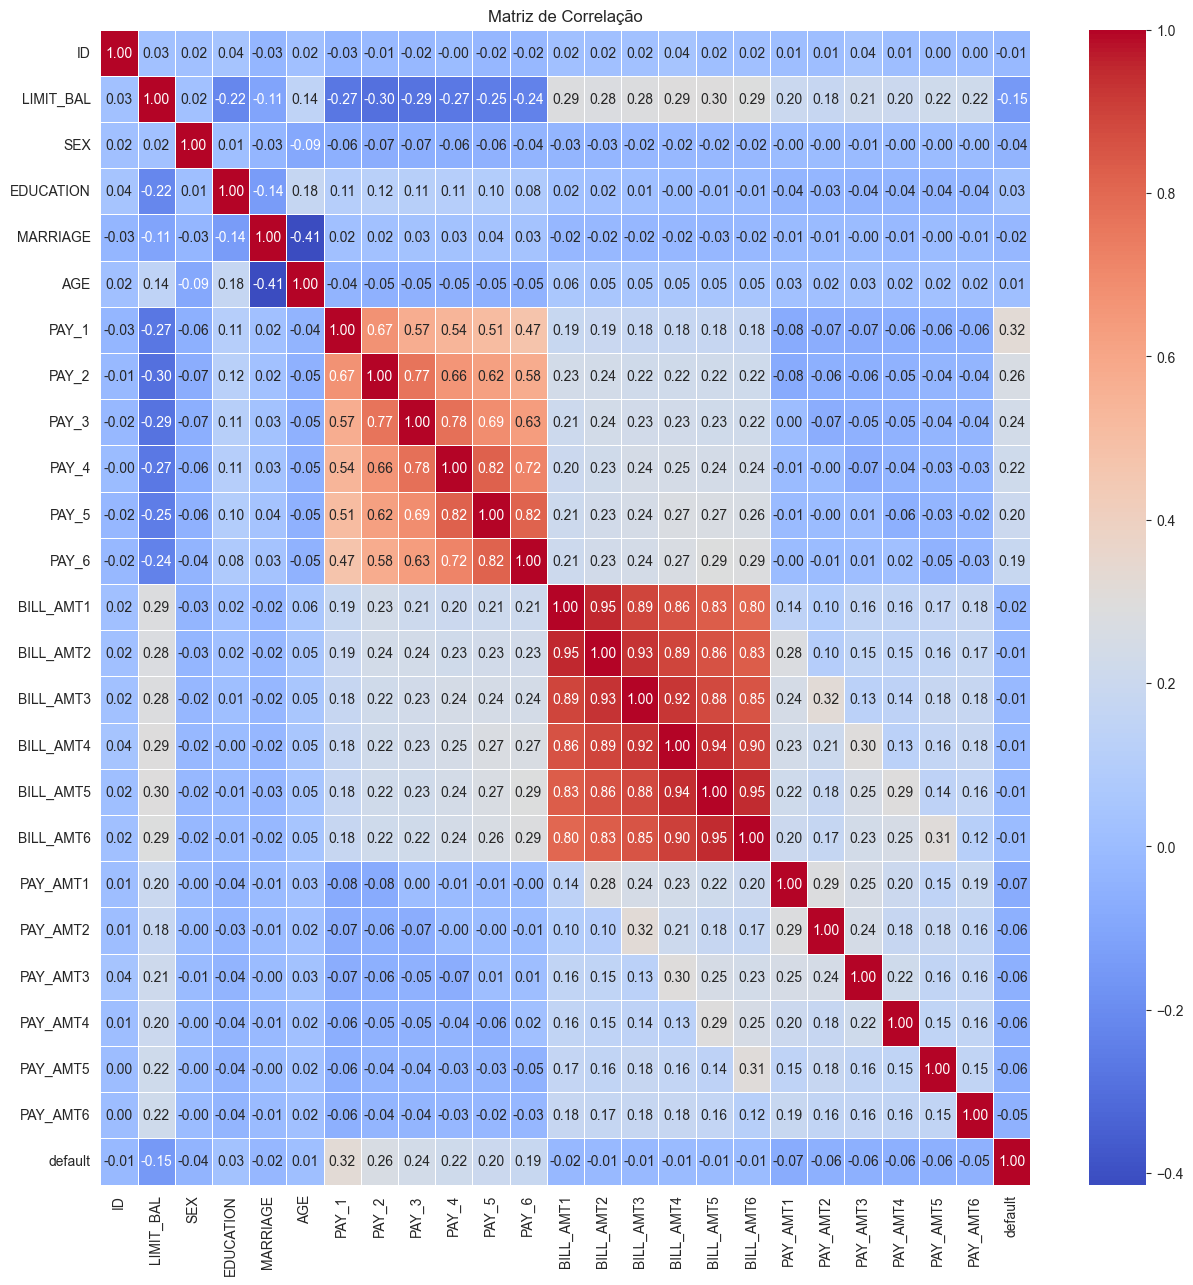

In [176]:
explorer.correlacao()

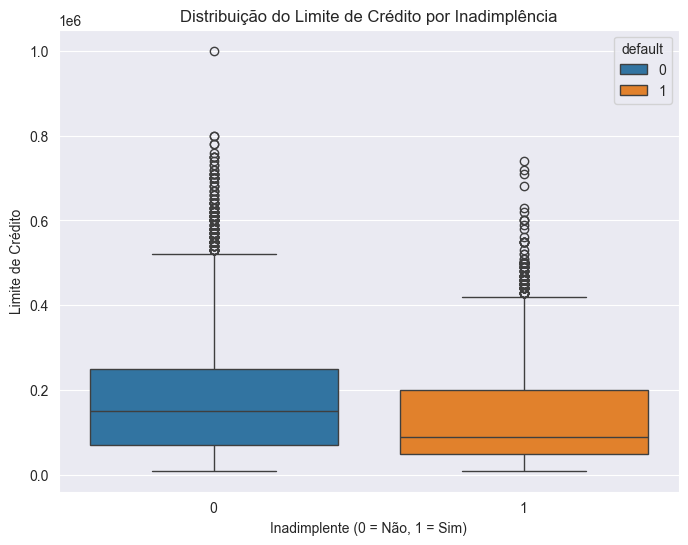

In [177]:
explorer.limit_vs_default()

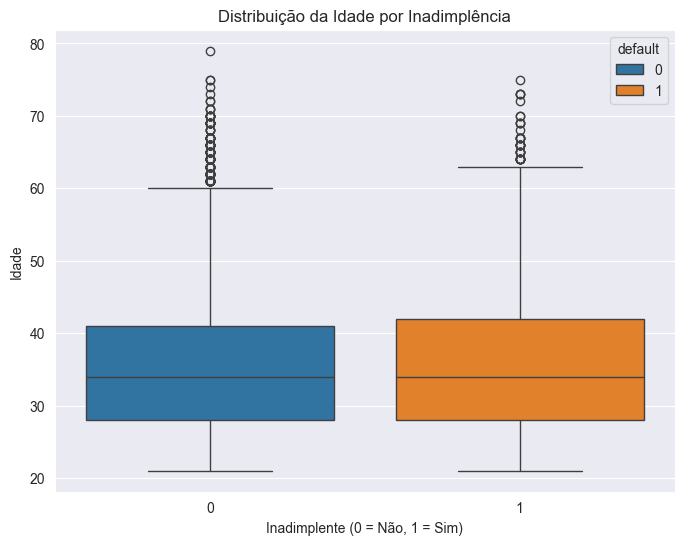

In [178]:
explorer.age_vs_default()

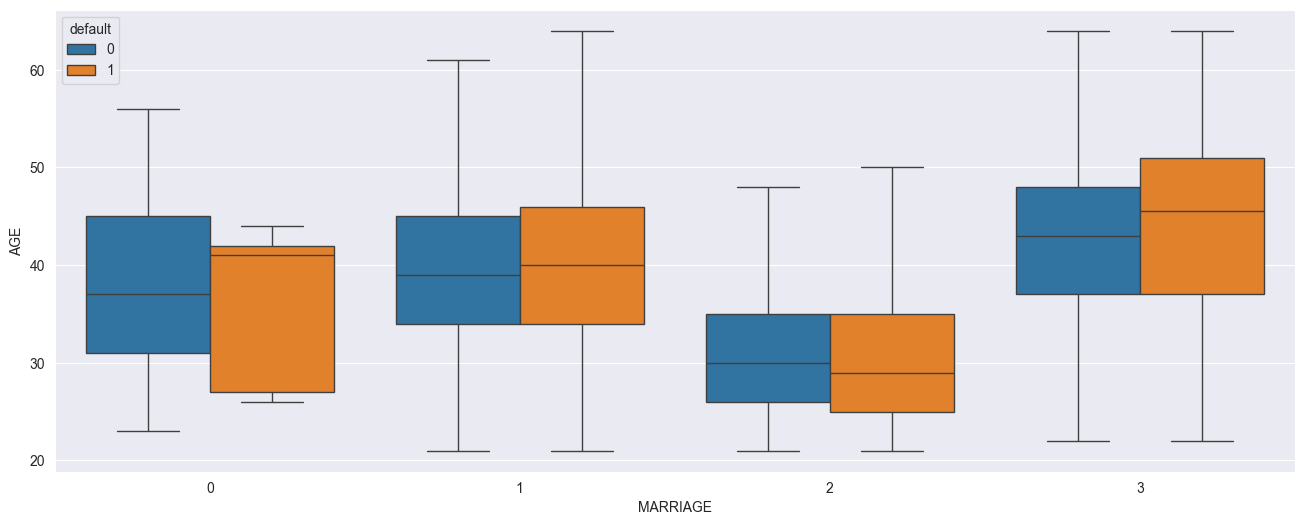

In [179]:
explorer.age_and_marriage_vs_default()

# Modelagem

## Bibliotecas

In [285]:
import pandas as pd
import numpy as np
from dataclasses import dataclass

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from concurrent.futures import ThreadPoolExecutor

import shap

## Criação de Novas Features

In [184]:

@dataclass
class FeatureEngineering:
    data: pd.DataFrame

    def create_features(self) -> pd.DataFrame:
        self.data['num_pag_nao_pagos_total'] = self.data[['pag_fatura_1', 'pag_fatura_2', 'pag_fatura_3', 'pag_fatura_4', 'pag_fatura_5', 'pag_fatura_6']].apply(lambda x: (x <= 0).sum(), axis=1)
        
        self.data['utilizacao_credito'] = (self.data['fatura_1'] + self.data['fatura_2'] + self.data['fatura_3'] + 
                                self.data['fatura_4'] + self.data['fatura_5'] + self.data['fatura_6']) / self.data['limite_credito']

        for i in range(1, 7):
            self.data[f'dif_pag_fatura_{i}'] = self.data[f'pag_fatura_{i}'] - self.data[f'fatura_{i}']

        self.data['media_pagamentos'] = (self.data['pag_fatura_1'] + self.data['pag_fatura_2'] + self.data['pag_fatura_3'] + 
                                self.data['pag_fatura_4'] + self.data['pag_fatura_5'] + self.data['pag_fatura_6']) / 6

        self.data['numero_atrasos'] = (self.data[['status_pag_1', 'status_pag_2', 'status_pag_3', 'status_pag_4', 'status_pag_5', 'status_pag_6']] > 0).sum(axis=1)
        self.data.replace([np.inf, -np.inf], 0, inplace=True)
        return self.data

In [185]:
df = pd.read_csv("Credit Card Default.csv")
df.rename(columns={'target': 'default'}, inplace=True)

y = df['default']
X = df.drop(columns=['default', 'ID'])

In [186]:
feature_enginering = FeatureEngineering(X)
X = feature_enginering.create_features()
X

,limite_credito,sexo,escolaridade,estado_civil,idade,status_pag_1,status_pag_2,status_pag_3,status_pag_4,status_pag_5,...,num_pag_nao_pagos_total,utilizacao_credito,dif_pag_fatura_1,dif_pag_fatura_2,dif_pag_fatura_3,dif_pag_fatura_4,dif_pag_fatura_5,dif_pag_fatura_6,media_pagamentos,numero_atrasos
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,5,0.385200,-3913.0,-2413.0,-689.0,0.0,0.0,0.0,114.833333,2
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2,0.142308,-2682.0,-725.0,-1682.0,-2272.0,-3455.0,-1261.0,833.333333,2
2,90000.0,2,2,2,34,0,0,0,0,0,...,0,1.129478,-27721.0,-12527.0,-12559.0,-13331.0,-13948.0,-10549.0,1836.333333,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,0,4.626680,-44990.0,-46214.0,-48091.0,-27214.0,-27890.0,-28547.0,1398.000000,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,0,2.186780,-6617.0,31011.0,-25835.0,-11940.0,-18457.0,-18452.0,9841.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,0,3.297041,-180448.0,-172815.0,-203362.0,-84957.0,-26237.0,-14980.0,7091.666667,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,2,0.141213,154.0,1698.0,5496.0,-8850.0,-5190.0,0.0,2415.000000,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,2,2.349867,-3565.0,-3356.0,19242.0,-16678.0,-18582.0,-16257.0,5216.666667,3
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,0,3.332638,87545.0,-74970.0,-75126.0,-50848.0,41109.0,-47140.0,24530.166667,1


## Normalização dos dados

In [197]:
status_payment = ['status_pag_1', 'status_pag_2', 'status_pag_3', 'status_pag_4', 'status_pag_5', 'status_pag_6', 'num_pag_nao_pagos_total', 'numero_atrasos']    
categorical_cols = ['sexo', 'escolaridade', 'estado_civil'] 
monetary_cols = ['fatura_1', 'fatura_2', 'fatura_3', 'fatura_4', 'fatura_5', 'fatura_6', 'dif_pag_fatura_1', 'pag_fatura_1', 'pag_fatura_2', 'pag_fatura_3', 'pag_fatura_4', 'pag_fatura_5', 'pag_fatura_6', 'dif_pag_fatura_2', 'dif_pag_fatura_3', 'dif_pag_fatura_4', 'dif_pag_fatura_5', 'dif_pag_fatura_6', 'limite_credito', 'media_pagamentos']
numeric_cols = ['idade', 'utilizacao_credito']
X.columns.difference(status_payment+categorical_cols+monetary_cols+numeric_cols)

Index([], dtype='object')

In [199]:
class DataScaler:
    def __init__(self, data):
        self.data = data
        self.imputer_mean = SimpleImputer(strategy='mean')
        self.imputer_mode = SimpleImputer(strategy='most_frequent')
        self.robust_scaler = RobustScaler()
        self.standard_scaler = StandardScaler()
        self.label_encoders = {}
        self.status_payment = ['status_pag_1', 'status_pag_2', 'status_pag_3', 'status_pag_4', 'status_pag_5', 'status_pag_6', 'num_pag_nao_pagos_total', 'numero_atrasos']    
        self.categorical_cols = ['sexo', 'escolaridade', 'estado_civil'] 
        self.monetary_cols = ['fatura_1', 'fatura_2', 'fatura_3', 'fatura_4', 'fatura_5', 'fatura_6', 'dif_pag_fatura_1', 'pag_fatura_1', 'pag_fatura_2', 'pag_fatura_3', 'pag_fatura_4', 'pag_fatura_5', 'pag_fatura_6', 'dif_pag_fatura_2', 'dif_pag_fatura_3', 'dif_pag_fatura_4', 'dif_pag_fatura_5', 'dif_pag_fatura_6', 'limite_credito', 'media_pagamentos']
        self.numeric_cols = ['idade', 'utilizacao_credito']    

    def input_na_numeric(self, columns):
        self.data[columns] = self.imputer_mean.fit_transform(self.data[columns])
        
    def input_na_categorical(self, columns):
        self.data[columns] = self.imputer_mode.fit_transform(self.data[columns])

    def scale_monetary_columns(self, columns):
        self.data[columns] = self.robust_scaler.fit_transform(self.data[columns])

    def scale_numeric_columns(self, columns):
        self.data[columns] = self.standard_scaler.fit_transform(self.data[columns])
    
    def create_dummies(self, columns):
        self.data = pd.get_dummies(self.data, columns=columns, drop_first=True)
    
    def scale_data(self):
        self.input_na_numeric(self.numeric_cols)
        self.input_na_categorical(self.categorical_cols)

        with ThreadPoolExecutor(max_workers=2) as executor:
            executor.submit(self.scale_monetary_columns, self.monetary_cols)
            executor.submit(self.scale_numeric_columns, self.numeric_cols)
            executor.submit(self.create_dummies, self.categorical_cols)
        return self.data

    def save(self, filename):
        with open(filename, 'wb') as file:
            dict_scaler = self.__dict__.copy()
            del dict_scaler['data']
            pickle.dump(dict_scaler, file)


In [201]:
scaler = DataScaler(X)
X = scaler.scale_data()
X

,limite_credito,idade,status_pag_1,status_pag_2,status_pag_3,status_pag_4,status_pag_5,status_pag_6,fatura_1,fatura_2,...,sexo_2,escolaridade_1,escolaridade_2,escolaridade_3,escolaridade_4,escolaridade_5,escolaridade_6,estado_civil_1,estado_civil_2,estado_civil_3
0,-0.631579,-1.246020,2,2,-1,-1,-2,-2,-0.290695,-0.296584,...,True,False,True,False,False,False,False,True,False,False
1,-0.105263,-1.029047,-1,2,0,0,0,2,-0.310071,-0.319150,...,True,False,True,False,False,False,False,False,True,False
2,-0.263158,-0.161156,0,0,0,0,0,0,0.107937,-0.117549,...,True,False,True,False,False,False,False,False,True,False
3,-0.473684,0.164303,0,0,0,0,0,0,0.387339,0.443008,...,True,False,True,False,False,False,False,True,False,False
4,-0.473684,2.334029,-1,0,-1,0,0,0,-0.216654,-0.254500,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.421053,0.381275,0,0,0,0,0,0,2.621763,2.812369,...,False,False,False,True,False,False,False,True,False,False
29996,0.052632,0.815221,-1,-1,-1,-1,0,0,-0.325795,-0.317462,...,False,False,False,True,False,False,False,False,True,False
29997,-0.578947,0.164303,4,3,2,-1,0,0,-0.296172,-0.292422,...,False,False,True,False,False,False,False,False,True,False
29998,-0.315789,0.598248,1,-1,0,0,0,-1,-0.378178,0.937030,...,False,False,False,True,False,False,False,True,False,False


## Exploração dos Modelos

In [203]:
class ModelTrainer:
    def __init__(self, X, y, test_size=0.2, random_state=42):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        self.models = {
            "KNN": KNeighborsClassifier(),
            "Decision Tree": DecisionTreeClassifier(),
            "Naive Bayes": GaussianNB(),
            "SVM": SVC(),
            "RandomForestClassifier": RandomForestClassifier(class_weight='balanced')
        }
        self.param_grids = {
            "KNN": {'n_neighbors': [3, 5, 7]},
            "Decision Tree": {
                'criterion': ['gini', 'entropy'],
                'splitter': ['best', 'random'],
                'max_depth': [None, 5, 15],
                'min_samples_split': [2, 10, 20],
                'min_samples_leaf': [1, 5, 10],
                'max_features': [None, 'sqrt', 'log2'],
                'max_leaf_nodes': [None, 10, 20],
                'ccp_alpha': [0.0, 0.01, 0.1]  
            },
            "Naive Bayes": {},
            "SVM": {
                'C': [0.1, 1, 10, 100],
                'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                'degree': [2, 3, 4],
                'gamma': ['scale', 'auto']
            },
            "RandomForestClassifier": {
                'n_estimators': [100, 200, 300],  # Número de árvores na floresta
                'max_depth': [5, 10, 15],         # Profundidade máxima das árvores
                'min_samples_split': [2, 5, 10],  # Número mínimo de amostras para dividir um nó
                'min_samples_leaf': [1, 2, 4],    # Número mínimo de amostras em uma folha
                'max_features': ['sqrt', 'log2']  # Critério para selecionar as features
            },
        }
        self.best_models = {}
        self.results = {}

    def train_model(self, model_name):
        if model_name not in self.models:
            raise ValueError(f"Modelo '{model_name}' não reconhecido. Modelos disponíveis: {list(self.models.keys())}")

        model = self.models[model_name]
        # Grid Search
        grid_search = GridSearchCV(model, self.param_grids[model_name], cv=3, scoring='f1')
        grid_search.fit(self.X_train, self.y_train)
        best_model = grid_search.best_estimator_

        predictions = best_model.predict(self.X_test)
        accuracy = accuracy_score(self.y_test, predictions)
        conf_matrix = confusion_matrix(self.y_test, predictions)

        self.best_models[model_name] = best_model
        self.results[model_name] = {
            "accuracy": accuracy,
            "report": classification_report(self.y_test, predictions, output_dict=True),
            "confusion_matrix": conf_matrix
        }

    def train_all(self):
        with ThreadPoolExecutor(max_workers=4) as executor:
            futures = {executor.submit(self.train_model, model_name): model_name for model_name in self.models.keys()}
        for future in futures:
            try:
                future.result()  # Aguarda a conclusão do treinamento
            except Exception as e:
                print(f"Erro ao treinar modelo: {futures[future]} - {e}")

    def show_metrics(self):
        metrics = {}
        for model_name, result in self.results.items():
            metrics[model_name] = {
                "Accuracy": result["accuracy"],
                "Precision": result["report"]["1"]["precision"],
                "Recall": result["report"]["1"]["recall"],
                "F1 Score": result["report"]["1"]["f1-score"],
                "Confusion Matrix": result["confusion_matrix"]
            }
        metrics_df = pd.DataFrame(metrics).T
        return metrics_df

    def get_best_models(self):
        return self.best_models

    def get_results(self):
        return self.results


In [204]:
df = pd.read_csv("Credit Card Default.csv")
df.rename(columns={'target': 'default'}, inplace=True)

y = df['default']
X = df.drop(columns=['default', 'ID'])

feature_enginering = FeatureEngineering(X)
X = feature_enginering.create_features()

scaler = DataScaler(X)
X = scaler.scale_data()
X

,limite_credito,idade,status_pag_1,status_pag_2,status_pag_3,status_pag_4,status_pag_5,status_pag_6,fatura_1,fatura_2,...,sexo_2,escolaridade_1,escolaridade_2,escolaridade_3,escolaridade_4,escolaridade_5,escolaridade_6,estado_civil_1,estado_civil_2,estado_civil_3
0,-0.631579,-1.246020,2,2,-1,-1,-2,-2,-0.290695,-0.296584,...,True,False,True,False,False,False,False,True,False,False
1,-0.105263,-1.029047,-1,2,0,0,0,2,-0.310071,-0.319150,...,True,False,True,False,False,False,False,False,True,False
2,-0.263158,-0.161156,0,0,0,0,0,0,0.107937,-0.117549,...,True,False,True,False,False,False,False,False,True,False
3,-0.473684,0.164303,0,0,0,0,0,0,0.387339,0.443008,...,True,False,True,False,False,False,False,True,False,False
4,-0.473684,2.334029,-1,0,-1,0,0,0,-0.216654,-0.254500,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.421053,0.381275,0,0,0,0,0,0,2.621763,2.812369,...,False,False,False,True,False,False,False,True,False,False
29996,0.052632,0.815221,-1,-1,-1,-1,0,0,-0.325795,-0.317462,...,False,False,False,True,False,False,False,False,True,False
29997,-0.578947,0.164303,4,3,2,-1,0,0,-0.296172,-0.292422,...,False,False,True,False,False,False,False,False,True,False
29998,-0.315789,0.598248,1,-1,0,0,0,-1,-0.378178,0.937030,...,False,False,False,True,False,False,False,True,False,False


In [207]:
trainer = ModelTrainer(X, y)
trainer.train_all()

In [208]:
trainer.show_metrics()

,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
Naive Bayes,0.541167,0.298432,0.811881,0.436438,"[[2181, 2506], [247, 1066]]"
KNN,0.799667,0.569462,0.346535,0.430871,"[[4343, 344], [858, 455]]"
RandomForestClassifier,0.7805,0.498691,0.58035,0.536431,"[[3921, 766], [551, 762]]"


# Modelo Final

- Modelo escolhido foi o Random Forest, pois tem uma melhor separação das classes

## Seleção de Features

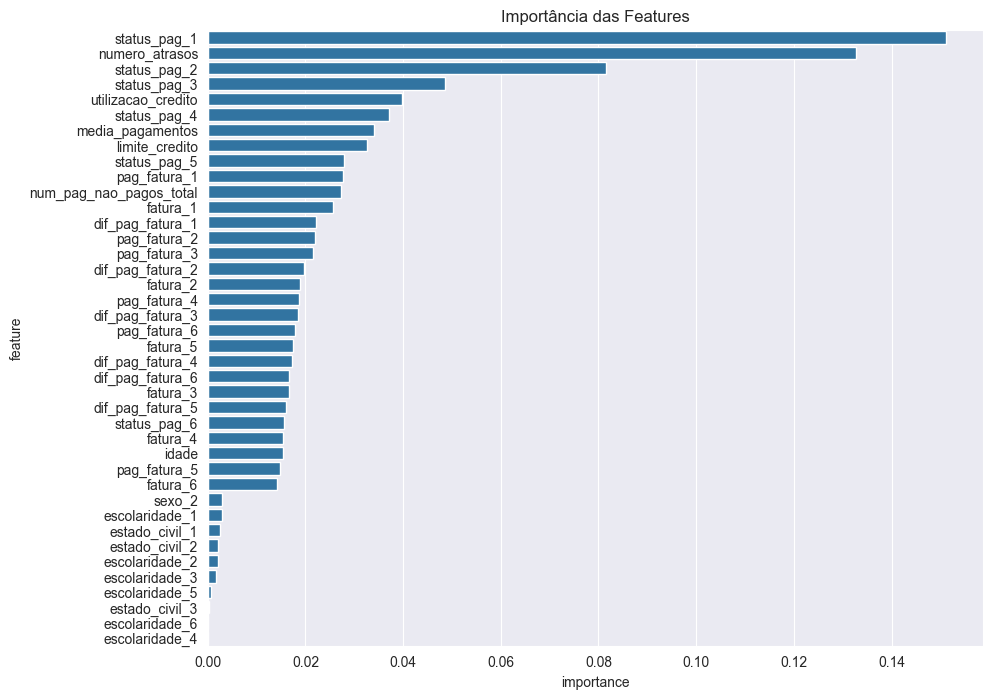

Accuracy com features selecionadas: 0.7818
Classification Report com features selecionadas:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      4687
           1       0.50      0.58      0.54      1313

    accuracy                           0.78      6000
   macro avg       0.69      0.71      0.70      6000
weighted avg       0.79      0.78      0.79      6000

Confusion Matrix com features selecionadas:
[[3931  756]
 [ 553  760]]


In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Treinamento do modelo Random Forest
model = RandomForestClassifier(random_state=42, class_weight='balanced', max_depth=10, max_features='sqrt', min_samples_leaf=4, min_samples_split=2, n_estimators=200)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]


# 8. Verificar a importância das features
importances = model.feature_importances_
feature_names = X.columns

importances_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values('importance', ascending=False)


# Plotar a importância das features
plt.figure(figsize=(10, 8))
sns.barplot(x=importances_df.importance, y=importances_df.feature)
plt.title("Importância das Features")
plt.show()

# Avaliar o desempenho do modelo
accuracy_top = accuracy_score(y_test, y_pred)
print(f'Accuracy com features selecionadas: {accuracy_top:.4f}')

print("Classification Report com features selecionadas:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix com features selecionadas:")
print(confusion_matrix(y_test, y_pred))

## Resultado com a seleção de features

In [248]:
max_num_features = len(importances_df)  # Número total de features disponíveis

# Inicializar variáveis para armazenar o melhor resultado
best_f1 = 0
best_num_features = 0
best_assert_class_0 = 0
best_assert_class_1 = 0

# Loop sobre o número de features de 1 a max_num_features
for num_features in range(10, max_num_features + 1):
    # Selecionar as top features
    top_features = importances_df['feature'].head(num_features).values
    X_train_top = X_train[top_features]
    X_test_top = X_test[top_features]

    # Treinar o modelo usando as top features
    rf_top = RandomForestClassifier(random_state=42, class_weight='balanced', max_depth=10,
                                    max_features='sqrt', min_samples_leaf=4, min_samples_split=2,
                                    n_estimators=200)
    rf_top.fit(X_train_top, y_train)

    # Fazer predições no conjunto de teste
    y_pred_top = rf_top.predict(X_test_top)

    # Calcular a matriz de confusão e as métricas
    cm = confusion_matrix(y_test, y_pred_top)
    assert_class_0 = cm[0][0]  # Verdadeiro Negativo
    assert_class_1 = cm[1][1]  # Verdadeiro Positivo

    report = classification_report(y_test, y_pred_top, output_dict=True)
    current_f1 = report['1']['f1-score']

    # Verificar se o F1 score atual é melhor que o melhor encontrado
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_num_features = num_features
        best_assert_class_0 = assert_class_0
        best_assert_class_1 = assert_class_1
        

# Exibir os melhores resultados
print(f'Melhor F1 Score: {best_f1:.4f} com {best_num_features} features')
print(f'Assertividade Classe 0: {best_assert_class_0}')
print(f'Assertividade Classe 1: {best_assert_class_1}')

Melhor F1 Score: 0.5418 com 21 features
Assertividade Classe 0: 3944
Assertividade Classe 1: 764


In [251]:
importances_df['feature'].head(best_num_features).values

array(['status_pag_1', 'numero_atrasos', 'status_pag_2', 'status_pag_3',
       'utilizacao_credito', 'status_pag_4', 'media_pagamentos',
       'limite_credito', 'status_pag_5', 'pag_fatura_1',
       'num_pag_nao_pagos_total', 'fatura_1', 'dif_pag_fatura_1',
       'pag_fatura_2', 'pag_fatura_3', 'dif_pag_fatura_2', 'fatura_2',
       'pag_fatura_4', 'dif_pag_fatura_3', 'pag_fatura_6', 'fatura_5'],
      dtype=object)

## Testando Modelo Sem Normalização

In [254]:
df = pd.read_csv("Credit Card Default.csv")
df.rename(columns={'target': 'default'}, inplace=True)

y = df['default']
X = df.drop(columns=['default', 'ID'])

feature_enginering = FeatureEngineering(X)
X = feature_enginering.create_features()
X = X.get(importances_df['feature'].head(best_num_features).values)
X

,status_pag_1,numero_atrasos,status_pag_2,status_pag_3,utilizacao_credito,status_pag_4,media_pagamentos,limite_credito,status_pag_5,pag_fatura_1,...,fatura_1,dif_pag_fatura_1,pag_fatura_2,pag_fatura_3,dif_pag_fatura_2,fatura_2,pag_fatura_4,dif_pag_fatura_3,pag_fatura_6,fatura_5
0,2,2,2,-1,0.385200,-1,114.833333,20000.0,-2,0.0,...,3913.0,-3913.0,689.0,0.0,-2413.0,3102.0,0.0,-689.0,0.0,0.0
1,-1,2,2,0,0.142308,0,833.333333,120000.0,0,0.0,...,2682.0,-2682.0,1000.0,1000.0,-725.0,1725.0,1000.0,-1682.0,2000.0,3455.0
2,0,0,0,0,1.129478,0,1836.333333,90000.0,0,1518.0,...,29239.0,-27721.0,1500.0,1000.0,-12527.0,14027.0,1000.0,-12559.0,5000.0,14948.0
3,0,0,0,0,4.626680,0,1398.000000,50000.0,0,2000.0,...,46990.0,-44990.0,2019.0,1200.0,-46214.0,48233.0,1100.0,-48091.0,1000.0,28959.0
4,-1,0,0,-1,2.186780,0,9841.500000,50000.0,0,2000.0,...,8617.0,-6617.0,36681.0,10000.0,31011.0,5670.0,9000.0,-25835.0,679.0,19146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,3.297041,0,7091.666667,220000.0,0,8500.0,...,188948.0,-180448.0,20000.0,5003.0,-172815.0,192815.0,3047.0,-203362.0,1000.0,31237.0
29996,-1,0,-1,-1,0.141213,-1,2415.000000,150000.0,0,1837.0,...,1683.0,154.0,3526.0,8998.0,1698.0,1828.0,129.0,5496.0,0.0,5190.0
29997,4,3,3,2,2.349867,-1,5216.666667,30000.0,0,0.0,...,3565.0,-3565.0,0.0,22000.0,-3356.0,3356.0,4200.0,19242.0,3100.0,20582.0
29998,1,1,-1,0,3.332638,0,24530.166667,80000.0,0,85900.0,...,-1645.0,87545.0,3409.0,1178.0,-74970.0,78379.0,1926.0,-75126.0,1804.0,11855.0


In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Treinamento do modelo Random Forest
model = RandomForestClassifier(random_state=42, class_weight='balanced', max_depth=10, max_features='sqrt', min_samples_leaf=4, min_samples_split=2, n_estimators=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
accuracy_top = accuracy_score(y_test, y_pred)
print(f'Accuracy com features selecionadas: {accuracy_top:.4f}')

print("Classification Report com features selecionadas:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix com features selecionadas:")
print(confusion_matrix(y_test, y_pred))

Accuracy com features selecionadas: 0.7843
Classification Report com features selecionadas:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      4687
           1       0.51      0.58      0.54      1313

    accuracy                           0.78      6000
   macro avg       0.69      0.71      0.70      6000
weighted avg       0.80      0.78      0.79      6000

Confusion Matrix com features selecionadas:
[[3943  744]
 [ 550  763]]


- Não houve alteração no resultado sem normalização, por isso o modelo final ficará sem essa etapa do processo, espcialmente por dois motivos:

1- Otimização do código em produção

2- Facilidade no entendimento do usuario final, em relação aos valores das features no gráfico da biblioteca shap, que será utilizada para explicação do modelo no front-end

In [256]:
model.feature_names_in_

array(['status_pag_1', 'numero_atrasos', 'status_pag_2', 'status_pag_3',
       'utilizacao_credito', 'status_pag_4', 'media_pagamentos',
       'limite_credito', 'status_pag_5', 'pag_fatura_1',
       'num_pag_nao_pagos_total', 'fatura_1', 'dif_pag_fatura_1',
       'pag_fatura_2', 'pag_fatura_3', 'dif_pag_fatura_2', 'fatura_2',
       'pag_fatura_4', 'dif_pag_fatura_3', 'pag_fatura_6', 'fatura_5'],
      dtype=object)

## Explicação do Modelo

In [286]:
explainer = shap.Explainer(model, X_train, feature_names=model.feature_names_in_)

[[0.74219852 0.25780148]]


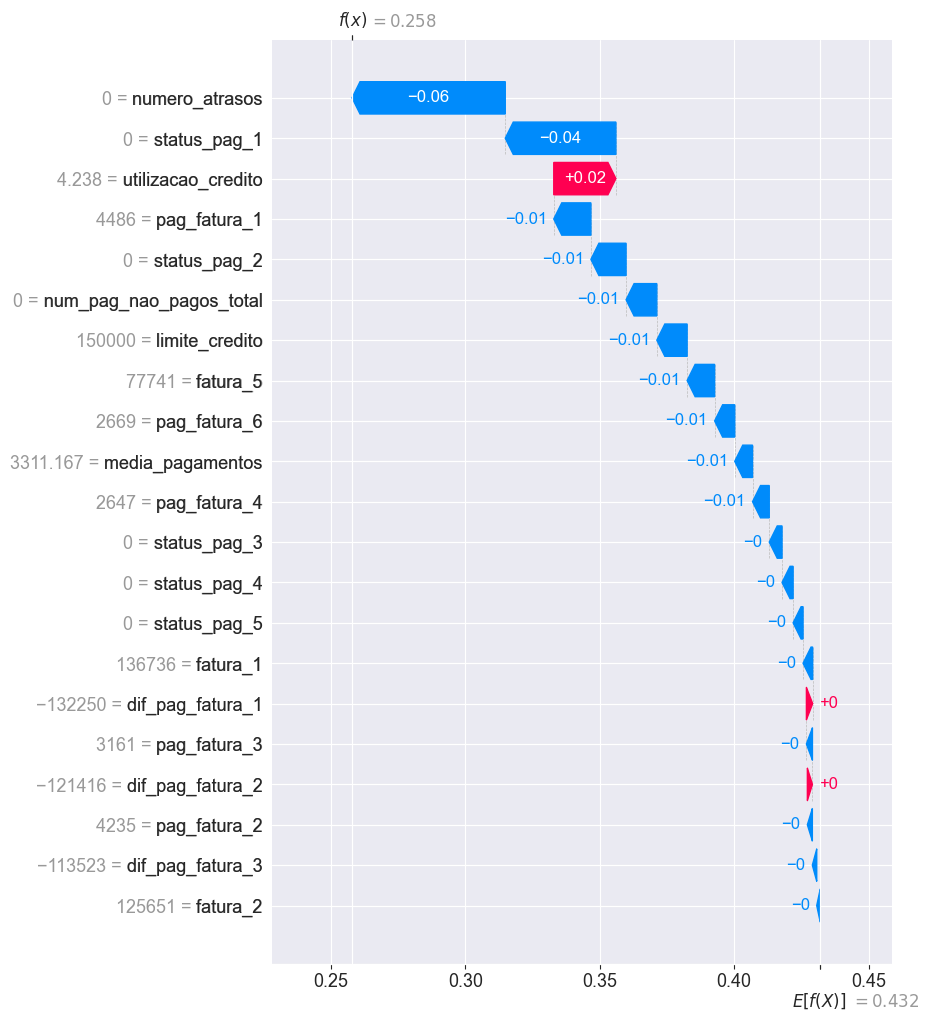

In [288]:
item = X_test.iloc[[1]]

print(model.predict_proba(item))
shap_values = explainer(item)
plot = shap.waterfall_plot(shap_values[0][:,1], show=False, max_display=25)
plt.show()

## Categorias

In [257]:
y_prob = model.predict_proba(X_test)[:, 1]
df_result = pd.DataFrame(y_prob, columns=['prob'])
df_result['result'] = y_test.values
df_result

,prob,result
0,0.368116,0
1,0.257801,0
2,0.308600,0
3,0.186824,0
4,0.438315,1
...,...,...
5995,0.408674,0
5996,0.731141,1
5997,0.438426,0
5998,0.425543,0


In [276]:
result = df_result.query('prob > 0.01').result.value_counts()
result[0] / result.sum()

0.7811666666666667

In [284]:
# Ajustar os intervalos com base na análise da proporção
bins = [0.05, 0.15, 0.3, 0.4, 0.7, 0.8, 0.9, 0.95]  # Intervalos ajustados
labels = ['AA','A', 'B', 'C', 'D', 'E', 'F']

# Classificando em categorias A-F
df_result['Categoria'] = pd.cut(df_result['prob'], bins=bins, labels=labels)
df_result.value_counts('Categoria')

Categoria
A     2088
C     1401
B     1289
AA     438
E      385
D      278
F      107
Name: count, dtype: int64

## Salvando Modelo Final

In [291]:
import pickle

# Salvar o modelo
with open('explainer.pkl', 'wb') as file:
    pickle.dump(explainer, file)
    
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
    
pd.concat([X_test, y_test], axis=1).to_csv('base_test.csv')

In [292]:
pd.concat([X_test, y_test], axis=1).to_csv('base_test.csv')